# <font color= Dark> <center> 094202 - Introduction to Data Analysis

# <font color= Dark><center> Final Project

### Shai Ochayon - 309674646
### Edo Cohen - 208849737

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [45]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### <font color=MidnightBlue> Part 1

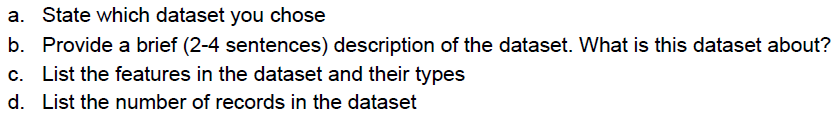

a. We chose to work with the FIFA 19 dataset. We chose this dataset since we are very passionate about both football and data and believe that our domain knowledge in this subject can add an extra value to our research. It was important to us to make something that can bring an actual value to football clubs and players. Hopefully, our work reflects that.
<br>b. This dataset provides detailed attributes for every player registered in the latest edition of FIFA 19 database. Every record represents a real player which has numerical attributes which describe his ability, wage, market value, and other categorical attributes such as the player's club, position, preferred foot etc.
<br> c. The features in the dataset and their types:

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

d. Number of records (players) in the dataset:

In [47]:
df.shape[0]

18207

### <font color=MidnightBlue> Cleaning the data:

We will start from removing columns which are irrelevant for our work:

In [48]:
df.drop(df.columns[[i for i in range(28,54)]], inplace=True, axis=1)
df.drop(columns=['Unnamed: 0','Photo','Flag','Club Logo','Special','Real Face'], inplace=True)

In [49]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

Next, we want to fix the columns wage and value so we can use them later. Currently, the mentioned columns are from type string.

In [50]:
# defining a function for cleaning the wage column
def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

df['Value'] = df['Value'].apply(lambda x: extract_value_from(x))
df['Wage'] = df['Wage'].apply(lambda x: extract_value_from(x))

Now, we will check for null values:

In [51]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

We can see that the number 48 is repeating many times. We will guess it is the same players, clear those records, and see later that it is indeed the case.

In [52]:
missing_height = df[df['Height'].isnull()].index.tolist()
df.drop(df.index[missing_height],inplace =True)
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Position                       12
Jersey Number                  12
Joined                       1505
Loaned From                 16895
Contract Valid Until          241
Height                          0
Weight                          0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Volleys                         0
Dribbling                       0
Curve                           0
FKAccuracy    

We guessed correctly and now we have much fewer columns containing nulls.

In [53]:
'''Create the funtions for different plots and visualization'''

'''Function to distribution plot'''
def distplot(variable, color):
    global ax
    font_size = 16
    title_size = 20
    plt.rcParams['figure.figsize'] = (18, 6)
    ax = sns.distplot(variable, color = color)
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.ylabel('Count of the Players', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title('%s' %variable.name + ' Distribution of Players', fontsize = title_size)
    plt.show()
    
'''Function to count plot'''     
def countplot(variable, title,  color):
    global ax
    font_size = 14
    title_size = 20
    plt.rcParams['figure.figsize'] = (18, 6)
    ax = sns.countplot(variable, palette = color)
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title(title, fontsize = title_size)
    plt.show()

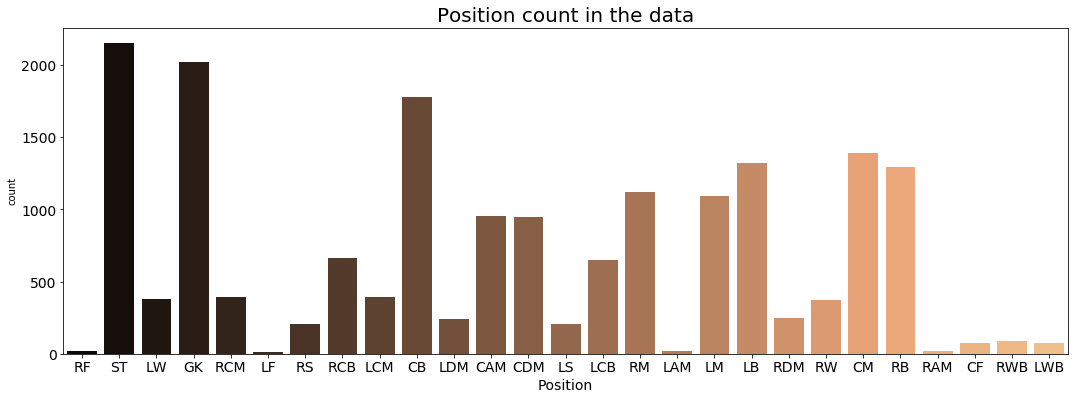

In [54]:
countplot(df['Position'],'Position count in the data', 'copper') #function countplot defined above

As we can see, the data has 28 types of positions, therefore we will merge the simillar positions to simplify our work.

In [55]:
# get the position from the data and return similar position to minimize amount of values.
def modify_position(row):
    if row['Position'] in ['RF','RW','RM']:
        return 'RW'
    elif row['Position'] in ['LF','LW','LM']:
        return 'LW'
    elif row['Position'] in ['RCM','LCM','LDM','RDM', 'CAM', 'CDM', 'LAM', 'RAM', 'CM']:
        return 'CM'    
    elif row['Position'] in ['GK']:
        return 'GK'
    elif row['Position'] in ['RB','RWB']:
        return 'RB' 
    elif row['Position'] in ['LB','LWB']:
        return 'LB'       
    elif row['Position'] in ['RCB','LCB','CB']:
        return 'CB'
    else: # position in ['ST', 'RS', 'LS', 'CF', nan]
        return 'ST'

df['Fixed Position'] = df.apply(modify_position, axis=1)

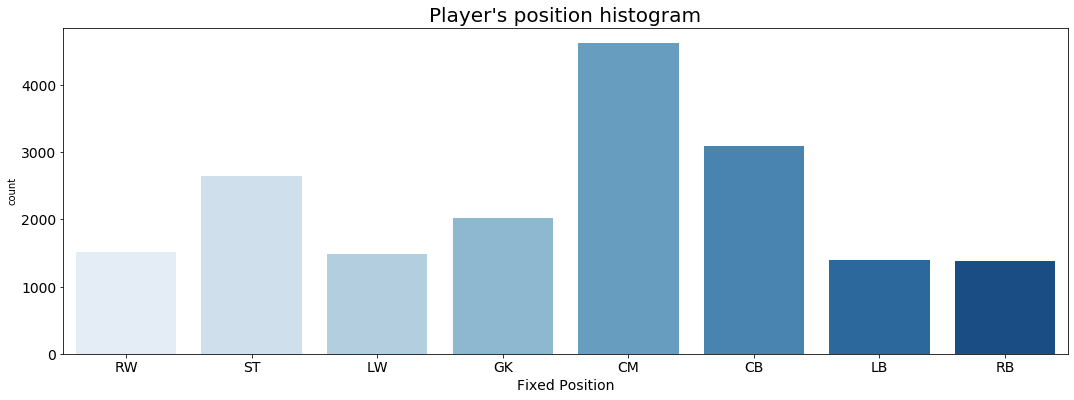

In [56]:
countplot(df['Fixed Position'],"Player's position histogram", 'Blues')

Now we have much fewer positions without a significant loss of information. This will help us analyze the data later. At first glance, we can see that the most common position is CM, we can assume it is because it is the most used position in most football formations. This leads us to part 2 where we will continue with the exploratory data analysis.

## <font color=MidnightBlue> Part 2

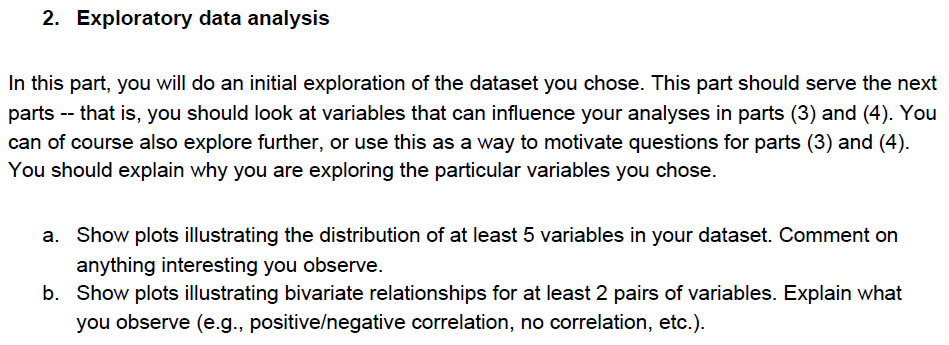

In our research we wanted to take a closer look at the financial side of football and the links between the players ability to their wage and value. We will especially look at the English Premier League (EPL) since it is the most profitable league out of Europe top leagues according to the Deloitte Football Money League.

The Deloitte Football Money League is a ranking of football clubs by revenue generated from football operations. By the report of 2019, 13 out of 30 European teams with the most revenue were English, with total revenue of three times more than the total revenue of the teams from Italy in the seconds place, this to say that the smaller football clubs in England earn more than top teams in other league making the EPL very competitive. Moreover, this has been the trend in the last decade.

 Operating profit of "Big five" European football league clubs from 2009 to 2018, by league :

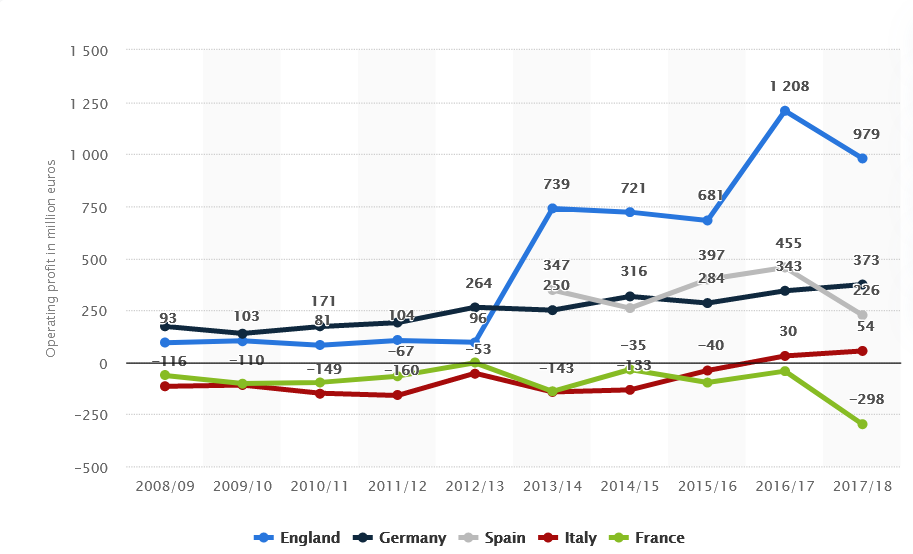

https://en.wikipedia.org/wiki/Premier_League#Finances
<br>https://en.wikipedia.org/wiki/Deloitte_Football_Money_League#2019
<br>https://www2.deloitte.com/content/dam/Deloitte/uk/Documents/sports-business-group/deloitte-uk-deloitte-football-money-league-2019.pdf
<br>https://www.statista.com/statistics/1022194/european-football-operating-profitr-profitability-by-league/

In the previous section we have already shown the the sum of players for each position, we will continue with some basic distributions and move on to more advanced correlations next.

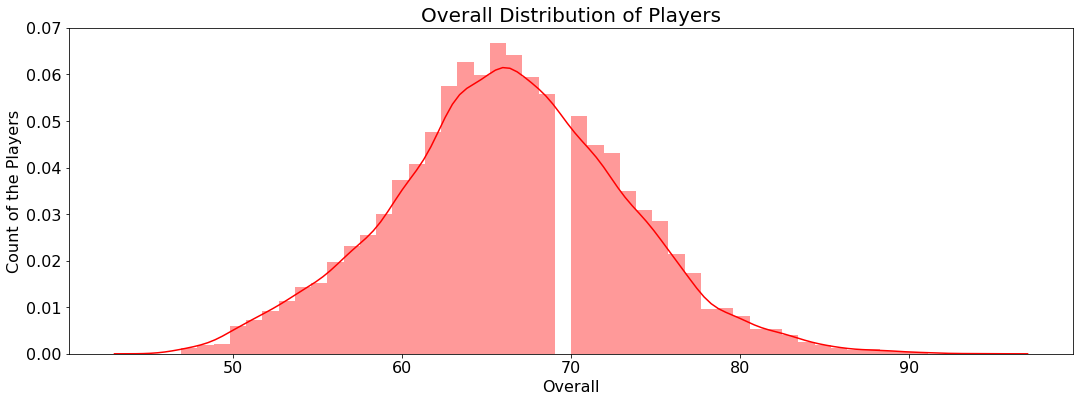

In [57]:
'''Distribution of the Age of the players'''
distplot(df['Overall'], 'r')

We can see that the overall rating is roughly distributed normally around 67.

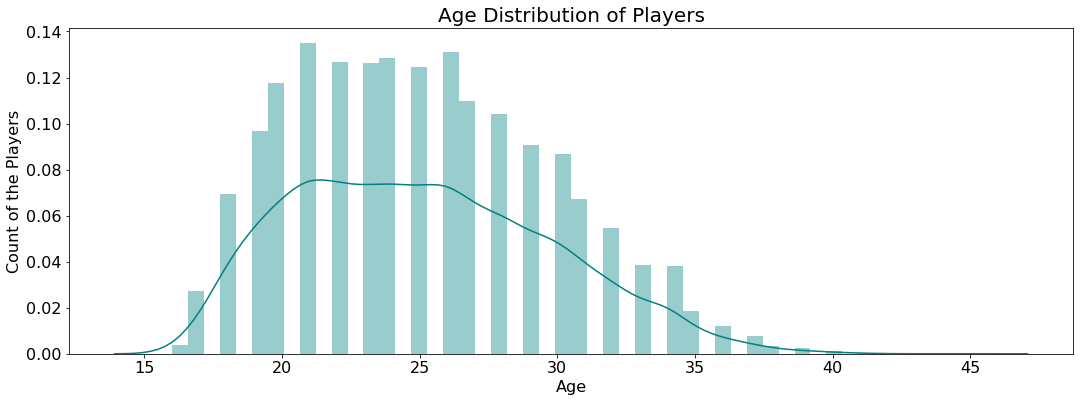

In [58]:
'''Distribution of the Age of the players'''
distplot(df['Age'], 'teal')

As we can expect most players are between 20 - 27 years old. The older the age the less common it is. players over 40 are very rare.

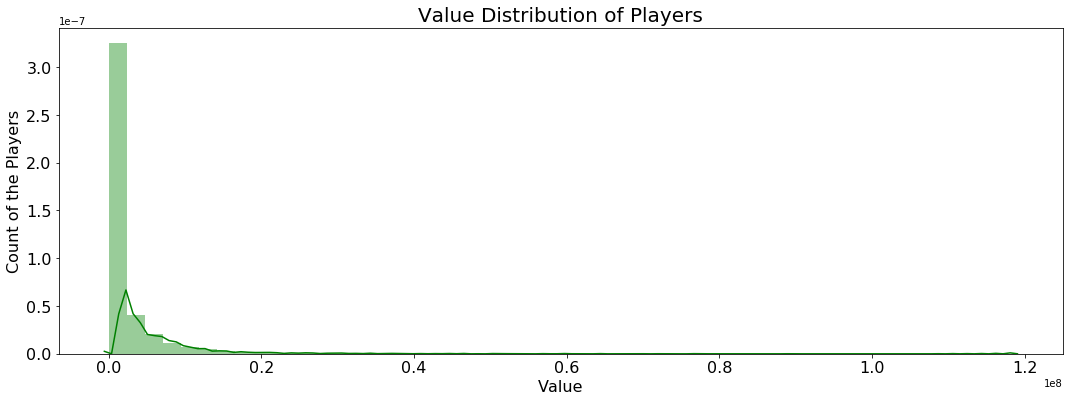

In [59]:
'''Distribution of the value of the players'''
distplot(df['Value'], 'g')

Most of the players value at less than 10,000,000 Euros. We will dive into the value of the players deeper later, so we will keep that in mind.

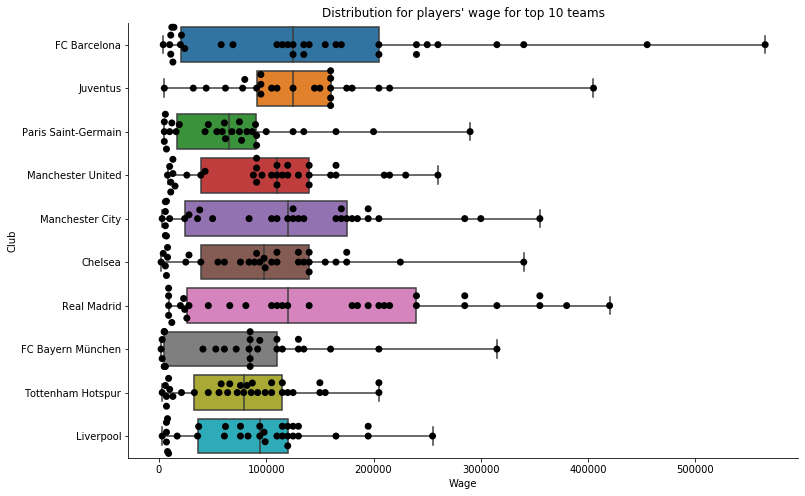

In [60]:
#Top 10 clubs by revenue: https://ftnnews.com/sports/38655-top-20-highest-revenue-generating-football-clubs
clubs = ['FC Barcelona', 'Real Madrid', 'Manchester United', 'FC Bayern München',
         'Paris Saint-Germain', 'Manchester City', 'Liverpool',
         'Tottenham Hotspur', 'Chelsea', 'Juventus']

#filter above teams and create visualization
top_clubs_df = df[df['Club'].isin(clubs)]
g = sns.boxplot(y = "Club", x = 'Wage', data = top_clubs_df, whis=np.inf)
g = sns.swarmplot(y = "Club", x = 'Wage', data = top_clubs_df, size = 7, color = 'black')

sns.despine() # remove the top and right line in graph
g.figure.set_size_inches(12,8)
plt.title("Distribution for players' wage for top 10 teams")
plt.show()

1. We can see that both Barcelona and Real Madrid have many players who earn very high salaries, and thus also has a very big range between the highest and the lowest earners.
2. We can see that Barcelona, Real Madrid, Manchester City and Juventus all equal with the highest median.
3. Tottenham Hotspur has the most players clustered around the same wage.
4. The outlying point for Barcelona is Messi, which is the highest paid player by a big margin.

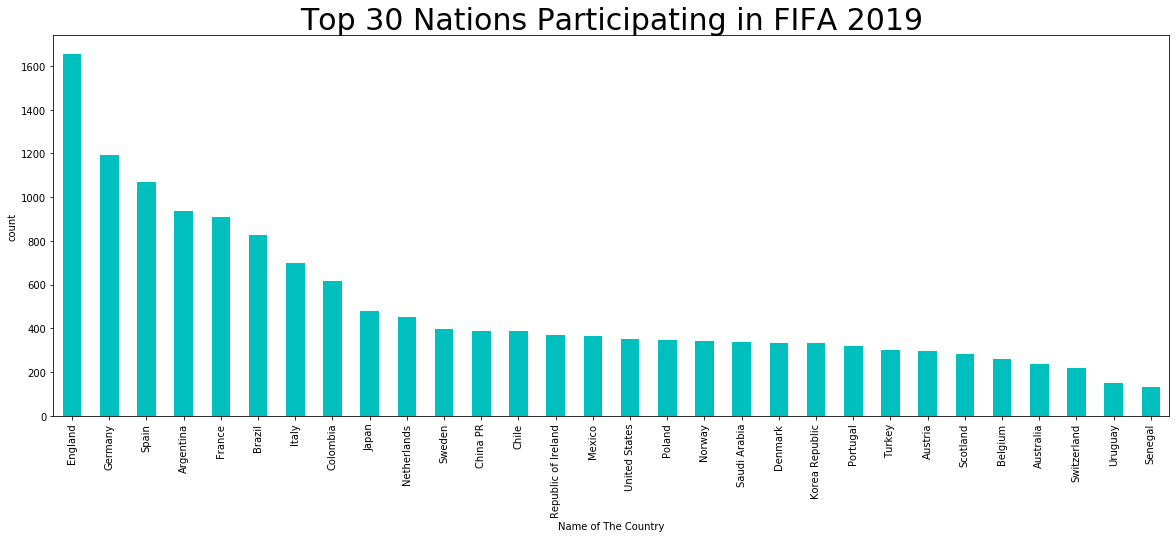

In [61]:
'''Different nations participating in the FIFA 2019'''
df['Nationality'].value_counts().head(30).plot.bar(color = 'c', figsize = (20, 7))
plt.title('Top 30 Nations Participating in FIFA 2019', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

The most frequent nationality in the data is England, we assume this does not mean that there are more English footballers in general but rather that the English football is more represented in the game at the lower levels.

Text(0.5, 1.0, 'Value per position')

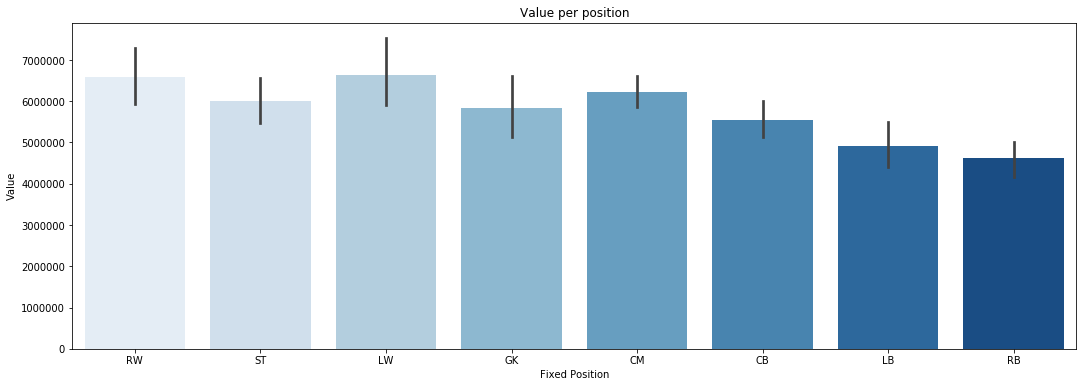

In [62]:
sns.barplot(data =df[df['Value'] > 1000000], x='Fixed Position', y='Value', palette="Blues");
#df1 = df[df['Value'] > 10000000]
plt.title('Value per position')

Full-back (RB/LB) are the players with the lowest value, while Wingers (RW/LW) are the players with the highest value. It is fair to assume that people love beautiful goals and are generally more attracted by the attacking side of football, and as we can see it is translated into the players' worth.

__USING EXTERNAL DATA:__
<br>One question which was especially important to us is to know how much players' value is correlated with the team success. Unfortunately, our dataset does not provide the information required to answer this question. As a result, we had to import an external data which presents the real-world data regarding the EPL success for the 18/19 season. Out of this data we looked at the Point-Per-Game (PPG) for each club and the correlation to the mean value of its players.

,Club,Value,PPG
0,Arsenal,9000000.0,1.84
1,Bournemouth,3400000.0,1.18
2,Burnley,6500000.0,1.05
3,Cardiff City,2500000.0,0.89
4,Chelsea,14500000.0,1.89
5,Crystal Palace,4050000.0,1.29
6,Everton,9000000.0,1.42
7,Fulham,3400000.0,0.68
8,Leicester City,6000000.0,1.37
9,Liverpool,14000000.0,2.55


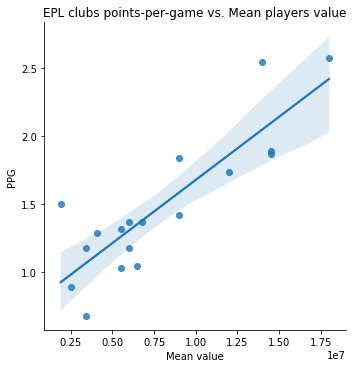

In [63]:
#https://footystats.org/download-stats-csv
epl_df = pd.read_csv('england-premier-league-teams-2018-to-2019-stats.csv')
epl_df = epl_df[['common_name','points_per_game']]

epl_clubs = ['Arsenal', 'Tottenham Hotspur', 'Manchester United', 'Manchester City',
             'Leicester City', 'Crystal Palace', 'Everton','Burnley', 'Southampton',
             'Bournemouth','Liverpool','Chelsea', 'West Ham United','Watford',
             'Newcastle United','Cardiff City','Fulham','Brighton & Hove Albion'
             'Huddersfield Town','Wolverhampton Wanderers']

epl_players_df = df[df['Club'].isin(epl_clubs)] #filter only epl clubs
epl_df = epl_df.replace('AFC Bournemouth','Bournemouth') #club name is different between datasets
epl_df.columns = ['Club', 'PPG']

clubs_value = epl_players_df.groupby('Club')['Value'].median()
clubs_value = clubs_value.to_frame().reset_index()

merged_epl = pd.merge(clubs_value, epl_df) #merge our df with external df

sns.lmplot(data = merged_epl, x = 'Value', y= 'PPG')
plt.xlabel('Mean value')
plt.title('EPL clubs points-per-game vs. Mean players value')
merged_epl

We can see that indeed in most cases the higher the mean value of the player is the more points the team won during the season. One might mistakenly think that spending more money is causing the team to be more successful. It is important to emphasize that correlation does NOT equal causation.

Now, we will look at the correlation between wage and overall rating. It will not surprise us to see that better players earn more money, but we will also split the players into two groups: English and non-English footballers:

Text(0.5, 1.0, 'Overall rating vs. Wage for English and non-English footballers')

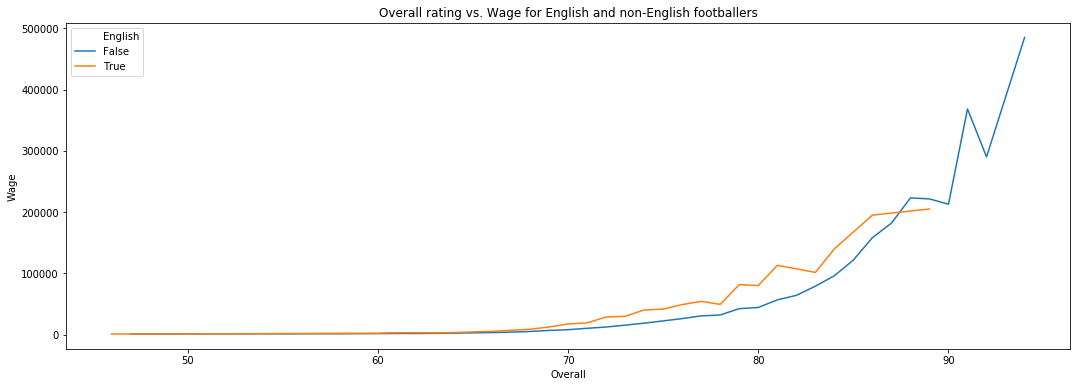

In [64]:
# create 2 dfs where nationality == England is both true and false and add this as a feature
english_df = df[df['Nationality'] == 'England']
english_df = english_df[['Overall', 'Wage']]
english_df['English'] = True

nonEnglish_df = df[df['Nationality'] != 'England']
nonEnglish_df = nonEnglish_df[['Overall', 'Wage']]
nonEnglish_df['English'] = False

#concat the dfs
english_concat_df = pd.concat([english_df, nonEnglish_df])
sns_object = sns.lineplot(data= english_concat_df, x= 'Overall', y='Wage', hue= 'English', ci=None)
plt.title('Overall rating vs. Wage for English and non-English footballers')

One can expect that players with the same overall rating, which represents the players ability, will have similar wages. As we can see though, English players with the same overall rating seems to earn more money. Later, we will try to quantify how big this difference really is, and whether it can just happen due to randomness.

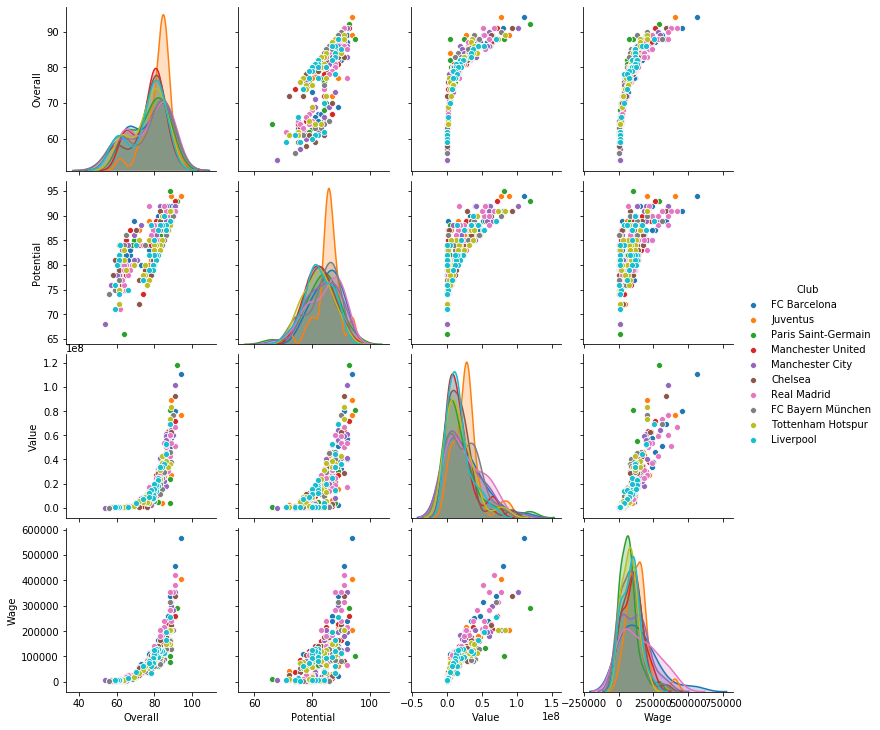

In [65]:
g = sns.pairplot(top_clubs_df[['Overall', 'Potential', 'Value', 'Wage','Club']],hue = 'Club')

1.  As the rating of the player gets higher, smaller changes in the rating increase the value by a big margin. We assume it is because the top players are very rare, and a small increment in their ability is hard to achieve, making their value much higher.
2. The potential is bounded from below by the overall as we would expect, since a player potential cannot be worse than his current ability.
3. Value and wage are nearly correlated linearly as a higher value is understandably correlated with the better players who earn more.

## <font color=MidnightBlue> Part 3

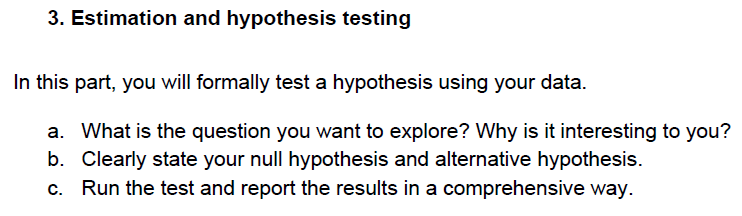

We discovered before that English top-level players earn more compared to non-English players with the same ability. We would like to test whether it is due to randomness or whether the difference is significant. We find this question interesting since we are exploring in our research the financial side of English football, and we think that the conclusion of this question can have practical implications on players' negotiation of contracts. Our null and alternative hypothesis is as followed:
<br> $H_{0}$: Top-level (overall 75+) English football players earn on average the same as non-English football players with the same football skills.
<br>$H_{1}$: Top-level (overall 75+) English football players earn on average more than non-English football players with the same football skills.
<br>__Test statistic__: The difference between the averages of the before mentioned groups.

First though, we want to make sure that the top English players' Overall ratings are distributed the same as those of the non-English since wage is very correlated with overall which represents general ability. If the English players are simply better, it would be meaningless to show they earn more money as we one easily expect that:

__The top graph represents overall distribution for non-English footballers, while the buttom one represents the English footballers distribution:__

Non-English median overall:  77.0
English median overall:  77.0
Non-English mean overall:  78.0972010178117
English mean overall:  77.99029126213593
Non-English mean STD:  3.3100503166225663
English mean STD:  2.688009488892081


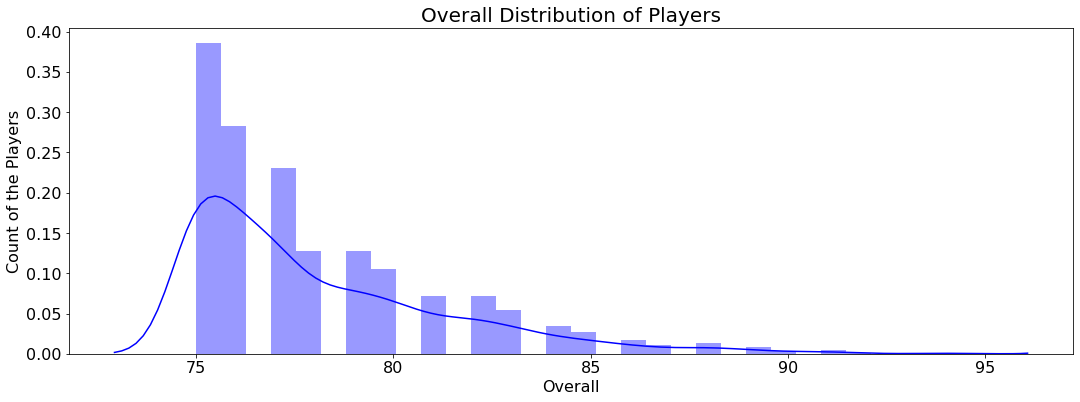

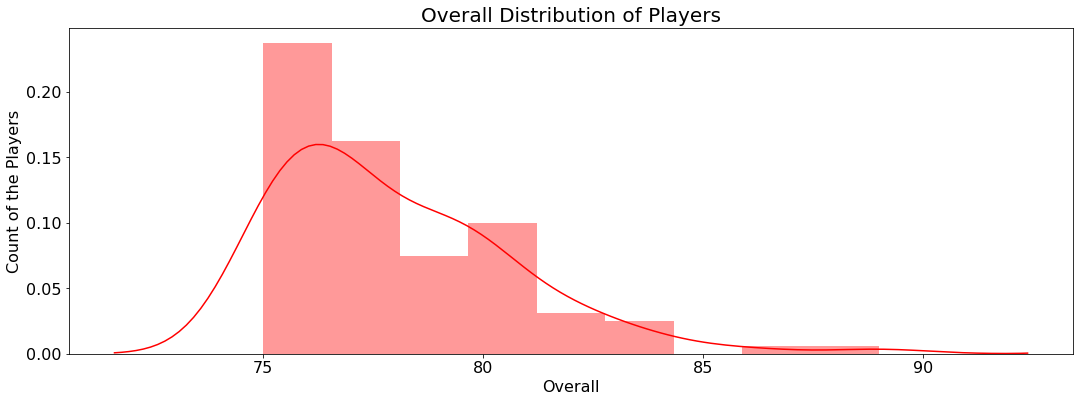

In [66]:
# filter only players with overall 75+ and print statistics
english_df = english_df[english_df['Overall'] >= 75]
nonEnglish_df = nonEnglish_df[nonEnglish_df['Overall'] >= 75]
print('Non-English median overall: ' , nonEnglish_df.Overall.median())
print('English median overall: ' , english_df.Overall.median())
print('Non-English mean overall: ' , nonEnglish_df.Overall.mean())
print('English mean overall: ' , english_df.Overall.mean())
print('Non-English mean STD: ' , nonEnglish_df.Overall.std())
print('English mean STD: ' , english_df.Overall.std())

distplot(nonEnglish_df['Overall'], 'b')
distplot(english_df['Overall'], 'r')

We can see that the data is distributed quite evenly for both groups so we can move on for testing our hypothesis.
<br> We will use bootstrap technique to simulate many groups of English and non-English players from our original data and then calculate the mean difference between the average wages. Finally, we will plot the distribution of all those differences.

In [67]:
english_concat_df = english_concat_df[english_concat_df['Overall'] >= 75]
print('The mean wage for all top players: ' ,english_concat_df['Wage'].mean())
english_concat_df

The mean wage for all top players:  45300.29013539652


,Overall,Wage,English
16,89,205000.0,True
60,86,195000.0,True
117,84,115000.0,True
135,84,165000.0,True
180,83,78000.0,True
...,...,...,...
2062,75,12000.0,False
2063,75,1000.0,False
2064,75,22000.0,False
2065,75,0.0,False


In [68]:
# calculate difference of averages
def diff_of_avgs(df, column_name, grouping_var):
    grpby_var = df.groupby(grouping_var)
    avgs = grpby_var[column_name].mean()
    return avgs[1] - avgs[0]

'''This function returns an array of bootstrapped differences between two sample averages:
  original_sample: df containing the original sample
  column_name: name of column containing the variable to average
  grouping_var: name of variable according to which to group
  num_replications: number of bootstrap samples'''
def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):

    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]] # the data from which we sample
    bstrap_mean_diffs = np.empty(num_replications)
    
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # WITH REPLACEMENT
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

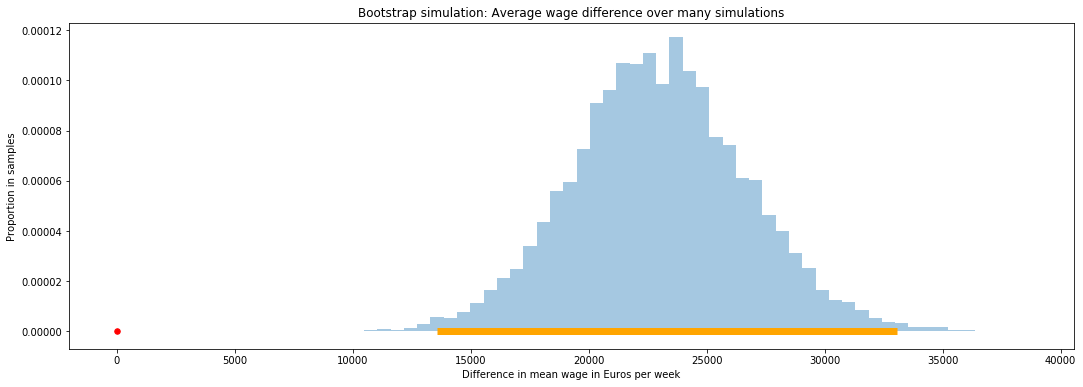

The 99% boostsrap confidence interval for difference is between  [13576.376549703775, 33066.073946420176]  Euros per-week


In [69]:
# run the bootstrap procedure
bstrap_diffs = bootstrap_mean_difference(english_concat_df, 'Wage', 'English', 10000)

# Get the endpoints of the 99% confidence interval
left_end = np.percentile(bstrap_diffs, 0.5, interpolation='higher')
right_end = np.percentile(bstrap_diffs, 99.5, interpolation='higher')

# visualize results
ax = sns.distplot(bstrap_diffs, kde=False, norm_hist=True,);
ax.set(xlabel='Difference in mean wage in Euros per week', ylabel='Proportion in samples');
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7)  # lw controls thickness of line
plt.scatter(0, 0, marker='o', s=30, color='red')  # draw observed value

plt.title('Bootstrap simulation: Average wage difference over many simulations')
plt.show()
print('The 99% boostsrap confidence interval for difference is between ', [left_end,right_end], ' Euros per-week')


We found out that on average top-level English football players earn roughly 14k - 33k Euros per week more (!!!). Clearly zero is outside the 99% CI for the difference between the means, therefore we reject the null hypothesis and conclude with 99% confidence level that there is a difference between the average wage of the two groups.
<br> Since the mean income for top level player is around 45k Euros p/w (and the median income is even lower), we found a great difference in wages between the groups, this could have massive implication for contract negotiation for all top level football players, especially in the EPL.
<br> It is important to emphasize that according to our findings we cannot conclude that being English leads to earning more money, but rather that there is merely a correlation between the two.
<br> Among others, a likely explanation to our findings is that according to the "Homegrown Player Rule" of the English Football Association (FA), each squad of the premier league teams must contain at least 8 out of 25 players who fulfill the "Home Grown Player" (HGP) criteria.
<br> A "Home-Grown Player" means a player who, irrespective of nationality or age, has been registered with any club affiliated to The Football Association or the Football Association of Wales for a period, continuous or not, of three entire seasons, or 36 months, before his 21st birthday (or the end of the season during which he turns 21).
<br> It is reasonable  to assume that majority of the players who fulfill the criteria are English. This combining with the previously  shown data by which the EPL is the most profitable football league in the world, may explain our findings.
<br> https://www.premierleague.com/news/1335777
<br> https://en.wikipedia.org/wiki/Homegrown_Player_Rule_(England)